In [2585]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

In [2586]:
from glob import glob

IMPORTATION DONNEES METEO

In [2587]:
stock_files=sorted(glob('D:/Challenge/FINAL/forecasting-the-flu/DonneesMeteorologiques/*.csv'))

In [2588]:
don=pd.concat((pd.read_csv(file,sep=';',na_values='mq').assign(filename=file)
          for file in stock_files),ignore_index=1)
don=pd.DataFrame(don)

In [2590]:
df=don.drop('filename',axis=1)
print(df.shape)

(2163605, 60)


In [2534]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isna(), cbar=False)   

IMPORTATION DE DONNEES DE TEST

In [2591]:
test=pd.read_csv('D:/Challenge/FINAL/forecasting-the-flu/test.csv',sep=',')

In [2592]:
test.rename(columns={'region_name': 'Region'}, inplace=True)

IMPORTATION DE DONNEES TRAINING

In [2593]:
train=pd.read_csv('D:/Challenge/FINAL/forecasting-the-flu/train.csv',sep=',')

In [2594]:
train['week'] = train['week'].astype(str)

In [2595]:
train.rename(columns={'region_name':'Region'},inplace=True)

In [2596]:
train1=train

IMPORTATION DE DONNES REGION

In [2597]:
region=sorted(glob('D:/Challenge/FINAL/forecasting-the-flu/RequetesGoogleParRegion/*.csv'))

In [2598]:
dat=pd.concat((pd.read_csv(file,sep=';',na_values='mq').assign(filename=file)
          for file in region),ignore_index=1)
data=pd.DataFrame(dat)

In [2599]:
data=data.drop('filename',axis=1)

FONCTION QUI PERMET DE CONVERTIR LA DATE EN ANNEE ET SEMAINE QUI PERMET DE FAIRE LA JOINTURE

In [2600]:
import datetime

def get_date_from_str(date_str):
    
    date_obj = datetime.date(int(date_str[0:4]), int(date_str[4:6]), int(date_str[6:8]))
    
    year_str = str(date_obj.year)
    week = str(date_obj.isocalendar()[1])
    
    if len(week) < 2:
        week = "0" + week
    
    return year_str + week

date_str = "20140101000000"


new_date = get_date_from_str(date_str)

In [2601]:
df['week'] = df['date'].astype(str).apply(get_date_from_str)

In [2602]:
df.drop('date',axis=1, inplace=True)

In [2603]:
df['week']=df['week'].astype(int)

In [2604]:
df=df.drop('Unnamed: 59', axis=1)

In [2606]:
df=df.fillna(0)

IMPORTATION DE LISTE_STATION

In [2607]:
df_station=pd.read_csv('D:/Challenge/FINAL/forecasting-the-flu/ListedesStationsMeteo.csv',sep=';')

In [2608]:
df_station.rename(columns={'ID': 'numer_sta'}, inplace=True)
df_station.drop('Nom', axis='columns', inplace=True)
df_station['Region'] = df_station['Region'].str.strip()
df_station.head()

,numer_sta,Latitude,Longitude,Altitude,Region
0,7005,50.136000,1.834000,69,PICARDIE
1,7015,50.570000,3.097500,47,NORD-PAS-DE-CALAIS
2,7020,49.725167,-1.939833,6,HAUTE-NORMANDIE
3,7027,49.180000,-0.456167,67,BASSE-NORMANDIE
4,7037,49.383000,1.181667,151,HAUTE-NORMANDIE


JOINTURE ENTRE METEO ET LISTE_STATION

In [2609]:
meteo_station=pd.merge(df_station,df,on='numer_sta',how='inner')

In [2610]:
meteo_station1=meteo_station.drop('numer_sta', axis='columns')
print(meteo_station1.shape)
meteo_station1 = meteo_station1.groupby(['Region','week']).agg('mean').reset_index()
print(meteo_station1.shape)

(1536111, 62)
(14805, 62)


JOINTURE ENTRE METEO STATION ET TRAINING POUR AVOIR LA BASE TRAIN FINALE

In [2611]:
train1['week'] = train1['week'].astype(str)
train1['Region'] = train1['Region'].astype(str)

In [2612]:
meteo_station1['week'] = meteo_station1['week'].astype(str)
meteo_station1['Region'] = meteo_station1['Region'].astype(str)

In [2613]:
meteo_station_train=pd.merge(train1,meteo_station1,on=['Region','week'],how='left')

REMPLACEMENT DU NOM REGION_NAME AVEC REGION POUR PERMETTRE LA JOINTURE

In [ ]:
df_station.drop('Nom', axis='columns', inplace=True)
df_station['Region'] = df_station['Region'].str.strip()
df_station.head()

JOINTURE ENTRE METEO STATION ET TEST POUR AVOIR LA BASE TEST FINALE

In [2575]:
test['week'] = test['week'].astype(str)
test['Region'] = test['Region'].astype(str)

In [2576]:
meteo_station1['week'] = meteo_station1['week'].astype(str)
meteo_station1['Region'] = meteo_station1['Region'].astype(str)

In [2577]:
meteo_station_test=pd.merge(test,meteo_station1,on=['Region','week'],how='left')

In [2580]:
meteo_station_test=meteo_station_test.drop('Unnamed: 59',axis=1)

SAUVEGARDE DES BASES FINALES DE TEST ET DE TRAIN POUR EMPORTER PLUS TARD

In [2581]:
meteo_station_train.to_csv('D:/Challenge/base_train.csv',index=False, na_rep='mq')
meteo_station_test.to_csv('D:/Challenge/base_test.csv',index=False, na_rep='mq')

In [ ]:
df_test=meteo_station_test

ESSAYONS D'AUTRES MODELES AVANT DE CHOISIR UN SEUL

In [2584]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor

In [98]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSGD', Pipeline([('Scaler', StandardScaler()),('SGDR', SGDRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

In [99]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_new, Y_new, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLR: -22217.148019 (18459.462606)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledLASSO: -21898.168178 (17962.550435)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledEN: -23332.963410 (16660.582079)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledKNN: -23048.023100 (15423.732495)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledCART: -39535.381271 (22132.929125)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledSGD: -22546.073752 (19704.559955)


C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ScaledGBM: -23562.882757 (18547.929704)


In [100]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_new)
rescaledX = scaler.transform(X_new)
param_grid = dict(n_estimators=np.array([50,100,200,300,400]))
model = GradientBoostingRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_new)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\octav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


-22978.852586 (18590.558594) with: {'n_estimators': 50}
-24017.101136 (19001.082593) with: {'n_estimators': 100}
-25316.480556 (20882.234606) with: {'n_estimators': 200}
-25740.579823 (22929.968216) with: {'n_estimators': 300}
-26098.340817 (23662.694375) with: {'n_estimators': 400}
Best: -22978.852586 using {'n_estimators': 50}


VERIFICATION DES CORRELATIONS POUR SUPPRIMER CERTAINES COLONNES

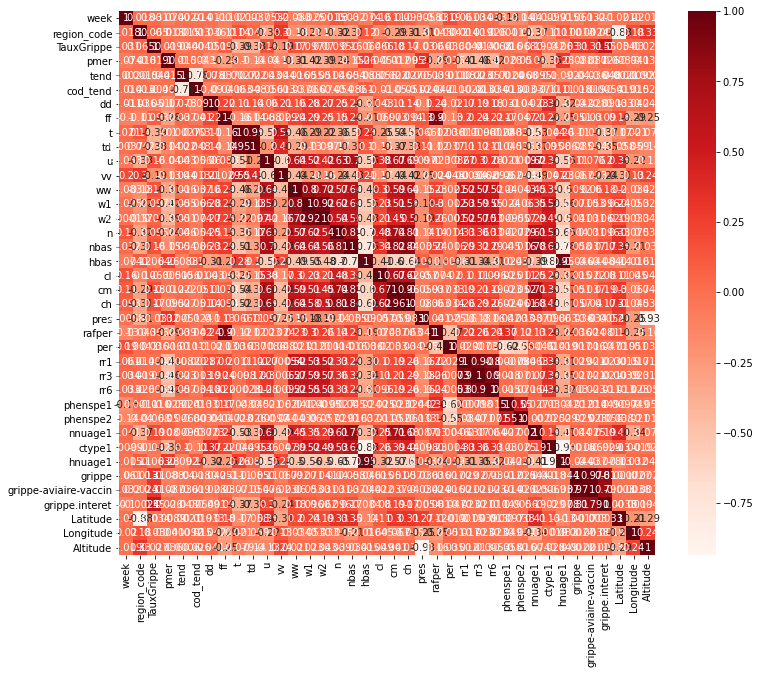

In [40]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [44]:
cor_target = abs(cor['TauxGrippe'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

TauxGrippe        1.000000
grippe.interet    0.552433
Name: TauxGrippe, dtype: float64

OBSERVATION DES VARIABLES SIGNIFICATIVES A PARTIR DE P_VALUE

In [63]:
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(Y,X_1).fit()
model.pvalues

const              4.724883e-18
week               5.890418e-23
region_code        2.262783e-23
pmer               1.942815e-06
tend               3.176520e-01
cod_tend           5.600989e-01
dd                 1.051976e-04
ff                 1.080597e-01
t                  9.526268e-37
u                  2.445168e-02
vv                 5.058476e-01
ww                 5.737547e-01
w1                 8.856038e-02
n                  2.940764e-01
nbas               8.716850e-01
hbas               6.848104e-03
cl                 7.880048e-02
cm                 9.946961e-01
pres               3.599004e-03
rafper             6.542784e-03
per                3.030925e-07
rr1                1.229528e-01
rr6                6.941761e-03
phenspe1           1.149462e-01
phenspe2           7.956171e-02
nnuage1            8.702234e-03
ctype1             6.956254e-01
grippe            3.366378e-126
grippe.interet     0.000000e+00
Latitude           1.254259e-05
Longitude          3.339361e-09
dtype: f

MODELISATION

NOUS TENONS A PRECISER QUE NOUS N'AVONS PAS GARDE UNE SEULE BASE
CAR NOUS SOMMES A LA RECHERCHE D'UN MEILLEUR RESULTAT
DONC NOUS AJOUTONS ET SUPPRIMONS DES COLONNES A CHAQUE FOIS QUE LE RESULTAT N'EST PAS SATISFAISANT

In [401]:
              #ff,td,u,vv,ww,w2,n,cl,cm,ch,pres,rafper ,'rr1','rr3','rr6',phenspe1    

In [ ]:
#'TauxGrippe','week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1',  'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3','rr1', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet','Longitude','u','vv','ch','ctype1','cod_tend','grippe-aviaire-vaccin'

In [ ]:
# aujour# 'TauxGrippe','week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet', 'Latitude', 'Longitude','u','vv','ch','grippe-aviaire-vaccin','ww'

In [ ]:
# 17h46  'tend','dd', 't', 'td', 'w1',   'cl', 'pres',  'per', 'rr3','rr1', 'u','vv','ch',,'rr6' , 'pmer','ctype1','phenspe2',

 LE TRAVAIL  COMMENCE ICI

IMPORTATION DE FICHIER TRAIN SAUVEGARDE

In [2638]:
mon=pd.read_csv('C:/Users/octav/OneDrive/Bureau/data/df_train.csv',na_values='mq',index_col='Id')

In [2639]:
mo.columns  #'TauxGrippe','week','region_code','hbas','rafper','nnuage1','grippe','grippe.interet','Longitude','Latitude ','cod_tend','grippe-aviaire-vaccin','tend','dd', 't','td','w1','cl','pres','per','rr3','rr1','u','vv','ch','rr6','pmer','ctype1','phenspe2'

Index(['week', 'region_code', 'Region', 'TauxGrippe', 'pmer', 'tend',
       'cod_tend', 'dd', 'ff', 't', 'td', 'u', 'vv', 'ww', 'w1', 'w2', 'n',
       'nbas', 'hbas', 'cl', 'cm', 'ch', 'pres', 'rafper', 'per', 'rr1', 'rr3',
       'rr6', 'phenspe1', 'phenspe2', 'nnuage1', 'ctype1', 'hnuage1', 'grippe',
       'grippe-aviaire-vaccin', 'grippe.interet', 'Latitude', 'Longitude',
       'Altitude'],
      dtype='object')

In [2640]:
new_train=mon.drop(['Region'],axis=1)       #   'ww','cod_tend','ctype1'     #,'u','vv','ch', 'grippe.interet' rétiré rr1, cod_tend,w1, 

In [2641]:
#bas[[week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet', 'Latitude', 'Longitude','u','vv','ch']]

In [2642]:
new_train1=new_train[['TauxGrippe','week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet', 'Latitude', 'Longitude','u','vv','ch']]

In [2643]:
# mes vraies colonnes [['TauxGrippe','week','region_code', 'pmer', 'tend','dd', 't','hbas', 'per', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet','Longitude','ctype1','cod_tend','ww','u','vv','cl','phenspe1','rr1','grippe-aviaire-vaccin','w2','rr6','cm','rr3','ch','pres','ff'

In [2644]:
#'week', 'region_code', 'pmer', 'tend', 'dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet','Latitude', 'Longitude','cod_tend','vv','ww','w2','rr1','rr6','cm','ctype1'

In [2645]:
#new_train1=new_train1.drop(['pmer', 'tend', 'dd','cl', 'rafper', 'rr3', 'phenspe2', 'Latitude'],axis=1)

In [2646]:
print(new_train1.shape)              #, 'td', 'w1', 'pres' qui ont été enlevée   #,'cm',  #,'vv','ww','w2','rr1','rr6','cm','ctype1'

(11324, 24)


In [2647]:
# experience  'pmer', 'tend', 'dd','cl', 'rafper', 'rr3', 'phenspe2', 'Latitude', 

In [2648]:
new_train2=new_train1.fillna(new_train1.mean())

In [2649]:
Y_new=new_train2['TauxGrippe']
X_new=new_train2.drop('TauxGrippe',axis=1)                   #,'ww','cod_tend','ctype1',   'grippe-aviaire-vaccin','w1', 'w2', 'n',

IMPORTATION DE FICHIER TEST SAUVEGARDE

In [2650]:
ton=pd.read_csv('C:/Users/octav/OneDrive/Bureau/data/df_test.csv',na_values='mq',index_col='Id')

In [2651]:
new_test=ton[['week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet', 'Latitude', 'Longitude','u','vv','ch']]

In [2652]:
#'week', 'region_code', 'pmer', 'tend', 'dd', 't', 'td', 'w1', 'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet','Latitude', 'Longitude','cod_tend','vv','ww','w2'

In [2653]:
#week', 'region_code',  't', 'hbas',  'per', 'nnuage1', 'grippe', 'grippe.interet','Longitude','vv','ww','w2'

In [2654]:
print(X_new.shape)

(11324, 23)


In [2655]:
new_test1=new_test.fillna(new_test.mean())

In [2656]:
print(new_test1.shape,new_train2.shape)

(3234, 23) (11324, 24)


In [2657]:
#test_new1=test_new.drop(['tend','dd','td','w1','cl','pres','rr3','phenspe2','nnuage1','Latitude'],axis=1)

In [2658]:
#test_new3=test_new1.fillna(test_new1.mean())

CREATION DES PEPILINES POUR ENTRAINER, EVALUER ET VALIDER LE MODELE

In [2659]:
from sklearn.compose import make_column_selector
from sklearn.neighbors import KNeighborsRegressor

In [2660]:
numerical_features =make_column_selector(dtype_include=np.number)
categorical_features =make_column_selector(dtype_exclude=np.number)

In [2670]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline( OneHotEncoder())

In [2671]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))

In [2672]:
model = make_pipeline(preprocessor,KNeighborsRegressor(n_neighbors=45))
print(model.fit(X_new, Y_new))

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000012B0C66B6D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000012B0C66B580>)])),
                ('kneighborsregressor'

In [2673]:
Y_new.isna()

Id
3235     False
3236     False
3237     False
3238     False
3239     False
         ...  
14714    False
14715    False
14716    False
14717    False
14718    False
Name: TauxGrippe, Length: 11324, dtype: bool

In [2674]:
y_pred=model.predict(new_test1)

In [2675]:
ss=pd.DataFrame(data=[new_test1.index,y_pred],index=['Id','TauxGrippe']).transpose()         #ss=U

In [2676]:
ss['Id'] = ss['Id'].astype(int)
print(ss.info())
ss

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3234 entries, 0 to 3233
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          3234 non-null   int32  
 1   TauxGrippe  3234 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 38.0 KB
None


,Id,TauxGrippe
0,1,23.355556
1,2,48.711111
2,3,25.333333
3,4,9.666667
4,5,9.688889
...,...,...
3229,3230,41.911111
3230,3231,53.777778
3231,3232,91.000000
3232,3233,54.844444


Votre soumission a obtenu une note de 83,29437, ce qui est une amélioration de votre score précédent de 86,73158. Excellent travail!

Votre soumission a obtenu une note de 82,36259, ce qui est une amélioration de votre score précédent de 83,29437. Excellent travail! Nous avons rajouté d'autres variables pour ameliorer le scole avant on était à 21 variables et on a ajouté 4 autres

L'Ajout de la variable grippe-aviaire-vaccin parmi les 23 autres('week','region_code', 'pmer', 'tend','dd', 't', 'td', 'w1',  'hbas', 'cl', 'pres', 'rafper', 'per', 'rr3', 'phenspe2', 'nnuage1', 'grippe', 'grippe.interet', 'Latitude', 'Longitude','u','vv','ch') nous ont permis d'ameliorer considérablement notre score
Votre soumission a obtenu une note de 81,65297, ce qui est une amélioration de votre score précédent de 82,36259. Excellent travail!

Avec 49 voisin, nous avons pu obtenir 81,35442 ce qui est vraiment considérabe. de Votre soumission a obtenu une note de 81,35442, ce qui est une amélioration de votre score précédent de 81,65297. Excellent travail!

In [2417]:
ss.to_csv('D:/Challenge/aujour1_05557.csv',index=False)             # sauvegarde de fichier de soumission kaggle

In [2677]:
from sklearn.model_selection import GridSearchCV

In [2678]:
param_grid = {'n_neighbors': np.arange(1, 45),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_new, Y_new)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])})

In [2679]:
print(grid.best_score_)
print(grid.best_params_)

0.03932872201325821
{'metric': 'manhattan', 'n_neighbors': 44}


In [ ]:
X_1 = sm.add_constant(X_new)
#Fitting sm.OLS model
model = sm.OLS(Y_new,X_1).fit()
model.pvalues

In [80]:
from sklearn.model_selection import cross_val_score

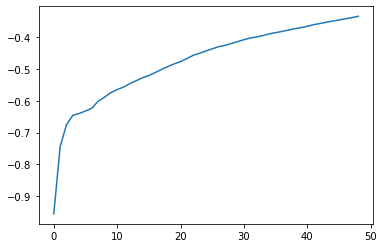

In [82]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsRegressor(k),X_new, Y_new, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [83]:
from sklearn.model_selection import validation_curve

C:\Users\octav\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


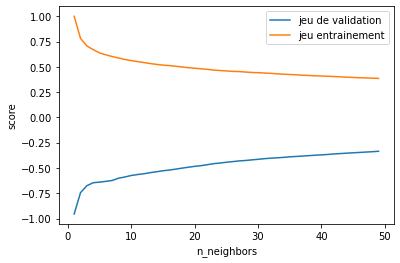

In [84]:
model = KNeighborsRegressor()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_new, Y_new,
                                          'n_neighbors', k, cv=5)

plt.plot(k, val_score.mean(axis=1), label='jeu de validation')
plt.plot(k, train_score.mean(axis=1), label='jeu entrainement')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [85]:
from sklearn.model_selection import learning_curve

[ 905 1811 2717 3623 4529 5435 6341 7247 8153 9059]


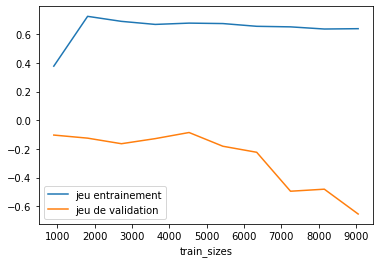

In [86]:
N, train_score, val_score = learning_curve(model,  X_new, Y_new,
                                           train_sizes=np.linspace(0.1, 1, 10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='jeu entrainement')
plt.plot(N, val_score.mean(axis=1), label='jeu de validation')
plt.xlabel('train_sizes')
plt.legend()

In [2636]:
# 'tend','pres','td','dd','td','w1','cl','rafper','rr3','phenspe2','Latitude ','nnuage1 '

In [951]:
# les variables à supprimer 'tend','dd','td','w1','cl','pres','rr3','nnuage1','phenspe2','grippe.interet'

In [ ]:
# 'Latitude', 'dd '